# Deutsch's algorithm

## Overview

- Type: Toy algorithm
- Approachability: Easy
- Related topics: Phase kickback, Deutsch-Jozsa algorithm, Bernstein–Vazirani algorithm

Deutsch's algorithm is one of the earliest quantum algorithms. It solves a toy problem, which is useless except to prove that quantum computers are sometimes better than classical computers. The ideas behind Deutsch's algorithm were later built on to create more impressive examples of quantum algorithms.


## Problem statement

Deutsch's problem is a black-box problem: Given a function, $f$, you must discover something about $f$ only by "querying" the function (that is, giving it some inputs and looking at the outputs).

In Deutsch's toy problem, $f$ is a deterministic function. It accepts a single bit, and returns a single bit as output.

$$ f: \{0, 1\} \rightarrow \{0, 1\} $$

The function $f$ must be either _balanced_ (the output of $f$ changes depending on the state of the input bit), or _constant_ (the ouput of $f$ is the same, regardless of the state of the input bit).

The problem asks us to discover whether $f$ is constant or balanced using as few queries as possible.


### Circuit form

We can draw $f$ as a two-bit, reversible circuit. The top bit ($a$) holds the input, and the circuit writes the output to the bottom bit ($b$). Specifically, the circuit will flip $b$ if $f(a) = 1$ and do nothing if $f(a) = 0$.

![](images/problem.svg)


## Algorithm

### Classical

If $a$ and $b$ are classical bits, we must query $f$ twice to work out if the output changes depending on the input. Once where $a = 0$ and once where $a = 1$. If the outputs are the same, $f$ is constant, if they differ then $f$ is balanced.

### Quantum

If $a$ and $b$ can be qubits, we can use the following algorithm.

 1. First, set $a = |{+}\rangle$ and $b = |{-}\rangle$.
 2. Run $f$ on these qubits
 3. Apply a H-gate to $a$
 4. Measure $a$
     - If we measure `0`, then $f$ if constant
     - If we measure `1`, then $f$ is balanced

This only needs one query.

![](images/algorithm.svg)

To see why this works, check out [phase kickback]().

## Qiskit implementation

There are four possible Deutsch functions, two constant and two balanced.

![](images/all-functions.svg)

The following code cell defines a Python function that can produce each of these circuits.

In [1]:
from qiskit import QuantumCircuit

def deutsch_function(case: int):
    """
    Generate a valid Deutsch function as a `QuantumCircuit`.
    """
    if case not in range(0, 4):
        raise ValueError("`case` must be integer >=0 and < 4.")
    f = QuantumCircuit(2)
    if case > 1:
        f.cx(0, 1)
    if case % 2 == 1:
        f.x(1)
    return f

The following cell defines a function that carries out Deutsch's algorithm.

In [2]:
from qiskit_aer import AerSimulator

def deutsch_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch function is constant or balanced.
    """
    # Set up qubits
    qc = QuantumCircuit(2, 1)
    qc.x(1)
    qc.h([0, 1])
    
    # Query f
    qc = qc.compose(function)
    
    # Apply H-gate to qubit A
    qc.h(0)
    
    # Measure, simulate, and interpret output
    qc.measure(0, 0)
    measurements = AerSimulator().run(qc,shots=1,memory=True).result().get_memory()
    if measurements[0] == '0':
        return "constant"
    return "balanced"

The following cell demonstrates Deutsch's algorithm on a balanced function. Try changing the number to see it solve a different function.

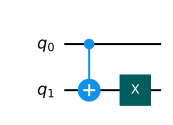

'balanced'

In [3]:
f = deutsch_function(3)
display(f.draw())
deutsch_algorithm(f)

## See also

- Original paper
- DJ-algorithm
- BV-algorithm